In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [3]:
X[:5]

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728]])

In [8]:
len(X)

100

In [4]:
y[:5]

array([[6.33428778],
       [9.40527849],
       [8.48372443],
       [5.60438199],
       [4.71643995]])

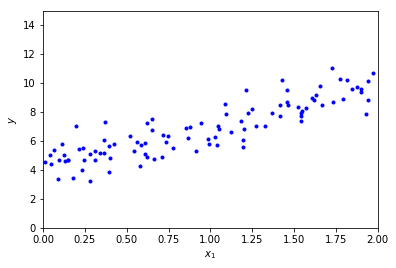

In [5]:
plt.plot(X, y,'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.axis([0, 2, 0, 15])
plt.show()

# Linear Regression Model
$ \hat{\theta} = \left(\mathbf{X}^T\cdot\mathbf{X} \right)^{-1} \cdot \mathbf{X}^T \cdot y$

In [6]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [9]:
X_b = np.c_[np.ones((100,1)),X]

In [10]:
X_b[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [11]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [12]:
np.linalg.inv(X_b.T.dot(X_b))

array([[ 0.03523199, -0.02683222],
       [-0.02683222,  0.02853394]])

In [13]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [16]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

print(X_new)



[[0]
 [2]]


In [17]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [18]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

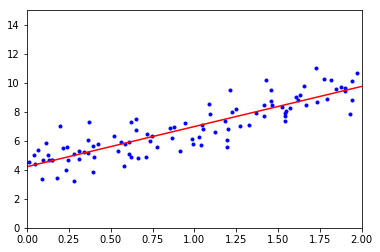

In [19]:
plt.plot(X, y,'b.')
plt.plot(X_new, y_predict, 'r-')
plt.axis([0, 2, 0, 15])
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
print(lm.intercept_,lm.coef_)

[4.21509616] [[2.77011339]]


In [21]:
lm.predict(X_new)

array([[4.21509616],
       [9.75532293]])

# Linear Regression using batch gradient descent

In [22]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for i in range(n_iterations):
    gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradient

In [23]:
theta

array([[4.21509616],
       [2.77011339]])

In [24]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [25]:
theta_path_bgd = []

def plot_gd(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X,y,'b.')
    n_iterations = 1000
    for i in range(n_iterations):
        if i<10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if i > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradient
        
        if i%100 ==0:
            print(gradient, theta)
        
        if theta_path is not None:
            theta_path.append(theta)
     
    plt.xlabel('$x_1$')
    plt.axis([0,2,0,15])
    plt.title(r"$\eta = {}$".format(eta))
    
    print('----------------------------------')
    print()
    

[[-12.90661674]
 [-14.17542424]] [[0.75484649]
 [0.14524418]]
[[-0.11332201]
 [ 0.09544853]] [[3.88967982]
 [3.05641461]]
[[-0.0561875 ]
 [ 0.04960968]] [[4.05068315]
 [2.91528095]]
[[-0.02843227]
 [ 0.02510415]] [[4.13189854]
 [2.84357236]]
[[-0.01438754]
 [ 0.01270341]] [[4.17299579]
 [2.80728572]]
[[-0.0072805 ]
 [ 0.00642829]] [[4.19379218]
 [2.78892364]]
[[-0.00368414]
 [ 0.0032529 ]] [[4.20431574]
 [2.77963191]]
[[-0.00186428]
 [ 0.00164606]] [[4.20964096]
 [2.77493003]]
[[-0.00094338]
 [ 0.00083295]] [[4.21233567]
 [2.77255075]]
[[-0.00047738]
 [ 0.0004215 ]] [[4.21369927]
 [2.77134676]]
----------------------------------

[[-12.90661674]
 [-14.17542424]] [[1.78737583]
 [1.27927812]]
[[-0.00694368]
 [ 0.00613089]] [[4.19533328]
 [2.78756293]]
[[-0.00021973]
 [ 0.00019401]] [[4.21447076]
 [2.77066557]]
[[-6.95336760e-06]
 [ 6.13944564e-06]] [[4.21507637]
 [2.77013086]]
[[-2.20038182e-07]
 [ 1.94281757e-07]] [[4.21509553]
 [2.77011394]]
[[-6.96307218e-09]
 [ 6.14801461e-09]] [[4.2

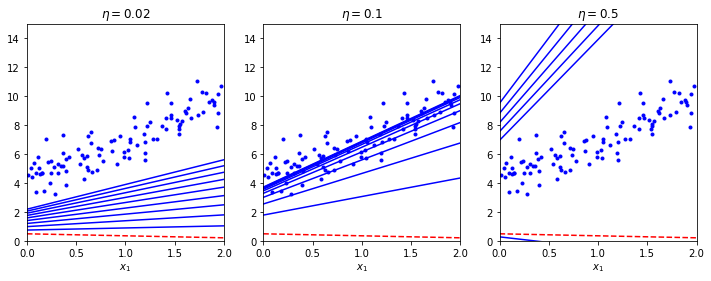

In [26]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(12,4))
plt.subplot(131)
plot_gd(theta, eta=0.02)
plt.subplot(132)
plot_gd(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133)
plot_gd(theta, eta=0.5)

plt.show()

# Stochastic Gradient Descent

In [27]:
theta_path_sgd = []
m = len(X_b)


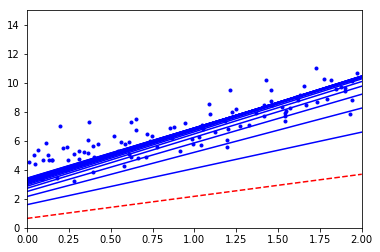

In [28]:
n_epochs = 50
t0 = 5
t1 = 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if i > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = X_b[random_index:random_index+1]
        gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradient
        theta_path_sgd.append(theta)

plt.plot(X,y,'b.')
plt.axis([0,2,0,15])

plt.show()
        

In [29]:
theta

array([[4.21457114],
       [2.77057695]])

In [30]:
from sklearn.linear_model import SGDRegressor

In [31]:
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=101)

In [32]:
y.shape

(100, 1)

In [33]:
y.ravel().shape

(100,)

In [34]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=101, shuffle=True, tol=-inf, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [35]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.25423288]), array([2.83043603]))

# Mini-batch gradient descent

In [36]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [37]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [38]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

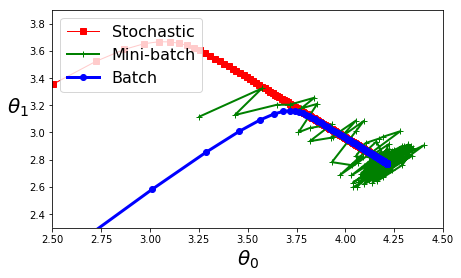

In [39]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

# Polinomial Regression

In [ ]:
m = 100
X = 10 * np.random.rand(m,1) - 5
y = 0.5 * X**2 + 2 * X + 4 + np.random.randn(m,1)

In [ ]:
plt.plot(X,y,'b.')
#plt.axis([-5,5,0,20])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X[0]

In [ ]:
X_poly[0]

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

In [ ]:
X_new = np.linspace(-5,5,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X,y,'b.')
plt.plot(X_new,y_new, 'r-')

In [ ]:
poly_features = PolynomialFeatures(degree=20, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, #lin_reg.coef_[:5]

In [ ]:
X_new = np.linspace(-5,5,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X,y,'b.')
plt.plot(X_new,y_new, 'r-')
plt.axis([-4,-2,20,60])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()